**Introduction**

This notebook explores the cleaned insurance claims dataset and visualises model performance from the logistic regression fraud detection pipeline.

Data source: Mendeley Insurance Claims Dataset

The goal is to identify patterns that differentiate fraudulent from legitimate claims.

**Imports and data load**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load data and model
df = pd.read_csv("../data/insurance_claims.csv")  # or clean_insurance_claims.csv if you saved it
model = joblib.load("../logistic_model.joblib")
preprocessor = joblib.load("../preprocessor.joblib")
selector = joblib.load("../feature_selector.joblib")

df.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


**Target distribution**

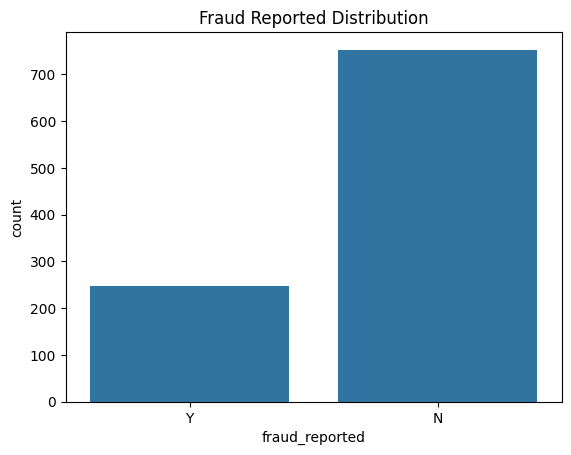

In [3]:
sns.countplot(x='fraud_reported', data=df)
plt.title('Fraud Reported Distribution')
plt.show()


**Feature correlations**

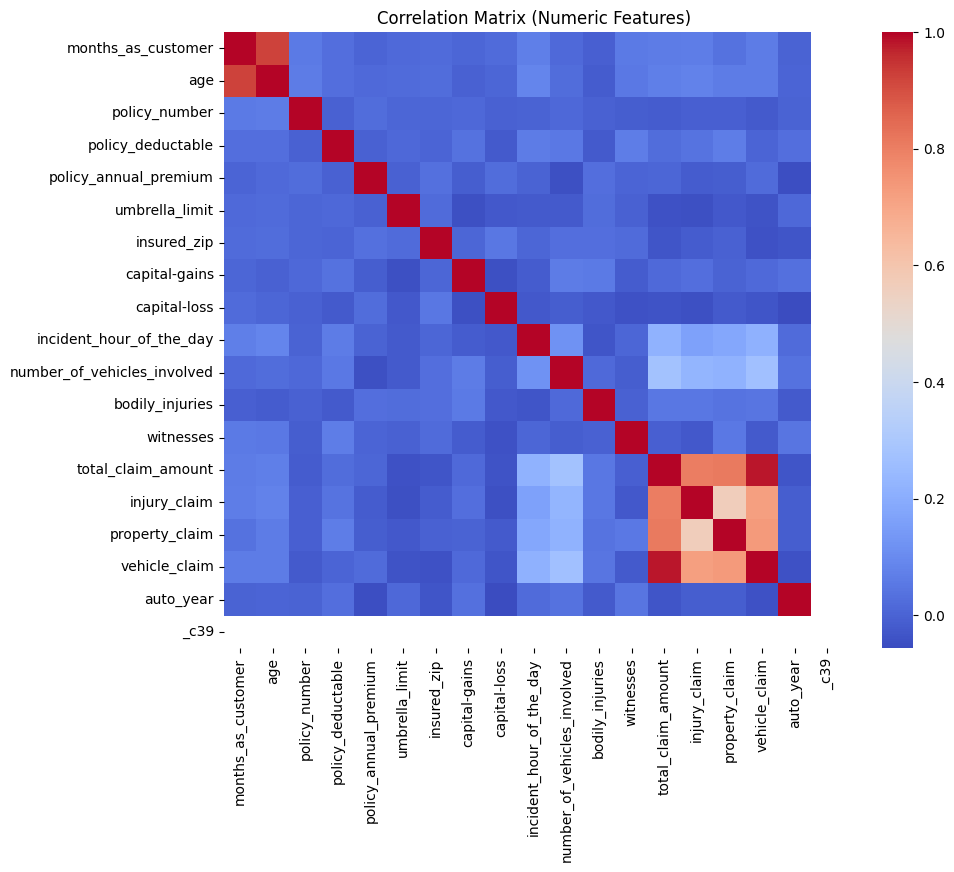

In [4]:
numeric_cols = df.select_dtypes('number')
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Features)")
plt.show()


**Model evaluation**

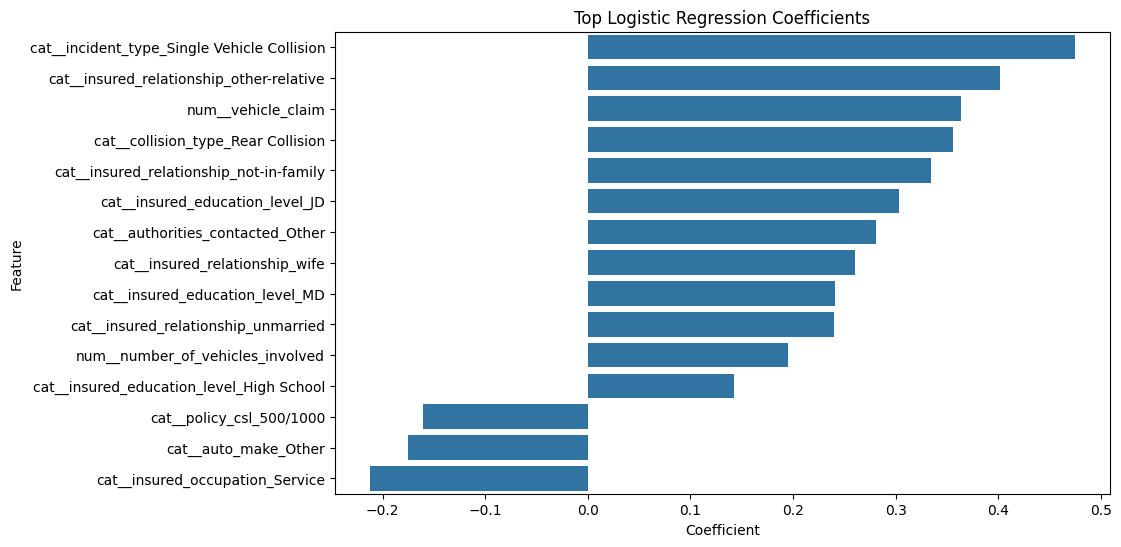

In [5]:
# Feature importances via coefficients
import numpy as np

feature_names = preprocessor.get_feature_names_out()
selected_features = feature_names[selector.support_]
coeffs = model.coef_.flatten()

importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': coeffs
}).sort_values('Coefficient', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(y='Feature', x='Coefficient', data=importance_df.head(15))
plt.title('Top Logistic Regression Coefficients')
plt.show()
